Hypothesis: Weather conditions affect to Nordpool Spot electric prices in Finland?

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

df = pd.read_csv('fmi_weather_and_price.csv', parse_dates=['Time'])
df

,Time,Wind,Temp,Price
0,2020-03-06 00:00:00,4.219394,-1.439604,1.70624
1,2020-03-06 01:00:00,4.273333,-1.583168,1.91456
2,2020-03-06 02:00:00,4.338182,-1.746535,1.85504
3,2020-03-06 03:00:00,4.289091,-1.900990,1.85876
4,2020-03-06 04:00:00,4.296341,-2.050249,1.89472
...,...,...,...,...
23034,2022-11-01 18:00:00,2.617365,3.098522,37.20496
23035,2022-11-01 19:00:00,2.754217,3.090099,37.95392
23036,2022-11-01 20:00:00,2.830539,3.141379,41.59580
23037,2022-11-01 21:00:00,2.849398,3.148276,27.15848


In [3]:
import plotly.express as px


fig = px.line(df, x='Time', y='Price', hover_data = 'Wind')
fig.show()

We could observe sharp jump in prices at the beggining of 2022 year. It could be caused by other factor, such as prices of energetic resources. To study hypothesis about "weather is affecting to electric prices" we need to clearn the data and also sample with different ways.

In [9]:
#get data from time period 2021-01-01 to 2021-01-31, when there was not such big impuct of growing energetic resources prices.


df2 = df[(df['Time'] >= '2021-01-01') &(df['Time'] <= '2021-01-31')]
df2

,Time,Wind,Temp,Price
7176,2021-01-01 00:00:00,5.177778,-2.008374,2.98468
7177,2021-01-01 01:00:00,5.096296,-2.068966,3.09380
7178,2021-01-01 02:00:00,5.035583,-2.071429,3.01940
7179,2021-01-01 03:00:00,4.946951,-2.084729,2.97352
7180,2021-01-01 04:00:00,4.835976,-2.090148,2.94128
...,...,...,...,...
7892,2021-01-30 20:00:00,3.350000,-6.695050,7.39288
7893,2021-01-30 21:00:00,3.409259,-6.744554,6.54472
7894,2021-01-30 22:00:00,3.433333,-6.874752,5.82304
7895,2021-01-30 23:00:00,3.355828,-6.989109,5.82552


In [10]:



fig = px.line(df2, x='Time', y='Price', hover_data = 'Wind')
fig.show()

In [11]:
#scatter plot
fig = px.scatter(df2, x='Time', y= 'Temp', hover_data=['Price'])
fig.show()

In [12]:
#Let's check correlation between Price and Temperature from the correlation matrix
df2.corr()

,Time,Wind,Temp,Price
Time,1.000000,0.108238,-0.057970,0.205486
Wind,0.108238,1.000000,-0.058678,0.087817
Temp,-0.057970,-0.058678,1.000000,-0.271163
Price,0.205486,0.087817,-0.271163,1.000000


Correlation coefficient is -0.27 shows that there are weak inverse dependense between temperature and prices. So if tempreture goes down, it could couse electricity price grow.

In this case we could also take into account consumption impact. Becouse duaring night time consumption is low. Althrough duaring night hours temperature usually goes down, we can notice that prices are lower during night hours. 

Let's group data by day and check correlation after that.


,Wind,Temp,Price,prices_shifted
Wind,1.000000,-0.079921,0.128396,-0.168969
Temp,-0.079921,1.000000,-0.398955,-0.456495
Price,0.128396,-0.398955,1.000000,0.678813
prices_shifted,-0.168969,-0.456495,0.678813,1.000000


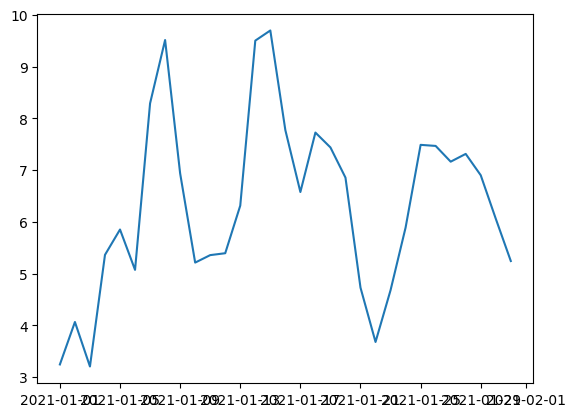

In [28]:
import matplotlib.pyplot as plt
df_dayly = pd.DataFrame(df2.groupby(pd.Grouper(key='Time', freq='D')).mean())
plt.plot(df_dayly['Price'])
df_dayly.corr()

In this case we could observe stronger inverse dependence between temperature and electricity prices (-0.40).

Conclusion

We investigated influence of weather conditions (Temperature) on electricity spot prices.

Electricity spot prices could be influenced by other factors such as fluel prices or consumption. We also should take into account, that spot-prices are estimated one day before. At the same time, in estimation could be used weather forecast, that's why I didn't shift data.


I sampeled and group data to minimaze influence of other factors.
According to correlation matrix there is mild inverse dependence between temperature and electricity prices (-0.40). 
